In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR,SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("E:\\python\\Telecom_customer_churn.csv")

In [3]:
raw_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
raw_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
raw_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
raw_data.shape

(7043, 21)

In [7]:
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

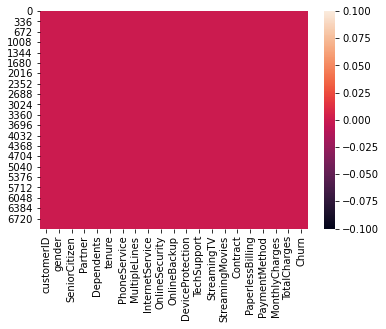

In [8]:
sns.heatmap(raw_data.isnull()) # heatmap also indicates that there are no null values in dataset.

In [9]:
#WE can see customerID column has unique id for each customer and hence we will drop this column as it will not be of any
#use in model building process 
raw_data.drop('customerID',axis=1,inplace=True)

In [10]:
raw_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
raw_data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [12]:
raw_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [13]:
raw_data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [14]:
raw_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [15]:
raw_data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
raw_data.index[raw_data.TotalCharges == ' ']

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [17]:
raw_data['TotalCharges'] = raw_data['TotalCharges'].replace(' ',np.nan,regex=True)

In [18]:
raw_data.index[raw_data.TotalCharges == ' ']

Int64Index([], dtype='int64')

In [19]:
raw_data['TotalCharges'] = raw_data['TotalCharges'].astype(float)

In [20]:
raw_data['TotalCharges'][753]

nan

In [21]:
#Now we have converted empty string in column 'TotalCharges' to nan value and then converted data type of this column
#from object to float. Now we will replace NAN values with mean value of this column.

In [22]:
raw_data['TotalCharges']  = raw_data['TotalCharges'] .fillna(raw_data['TotalCharges'] .mean())

In [23]:
raw_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

SeniorCitizen        AxesSubplot(0.125,0.125;0.168478x0.755)
tenure            AxesSubplot(0.327174,0.125;0.168478x0.755)
MonthlyCharges    AxesSubplot(0.529348,0.125;0.168478x0.755)
TotalCharges      AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

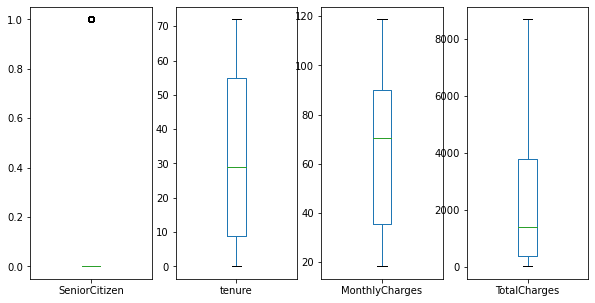

In [24]:
raw_data.plot(kind='box',subplots=True,figsize=(10,5))

In [25]:
#From above we can see that there are no outliers in dataset.

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
        'PaperlessBilling','PaymentMethod','Churn']

for i in cols:
    raw_data[i] = le.fit_transform(raw_data[i])

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(raw_data))
z
data_new = raw_data[(z<3).all(axis = 1)]

In [28]:
raw_data.shape

(7043, 20)

In [29]:
data_new.shape

(6361, 20)

In [30]:
#If outlier is removed with zcore method, we loose 9.6 % of data. Also there is no change in model performance if data is used
#after removing outliers and hence we will go ahead with data with outliers.
#raw_data = data_new

In [31]:
raw_data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [32]:
#We can see that even skewness is also minimal in dataset.

In [33]:
raw_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


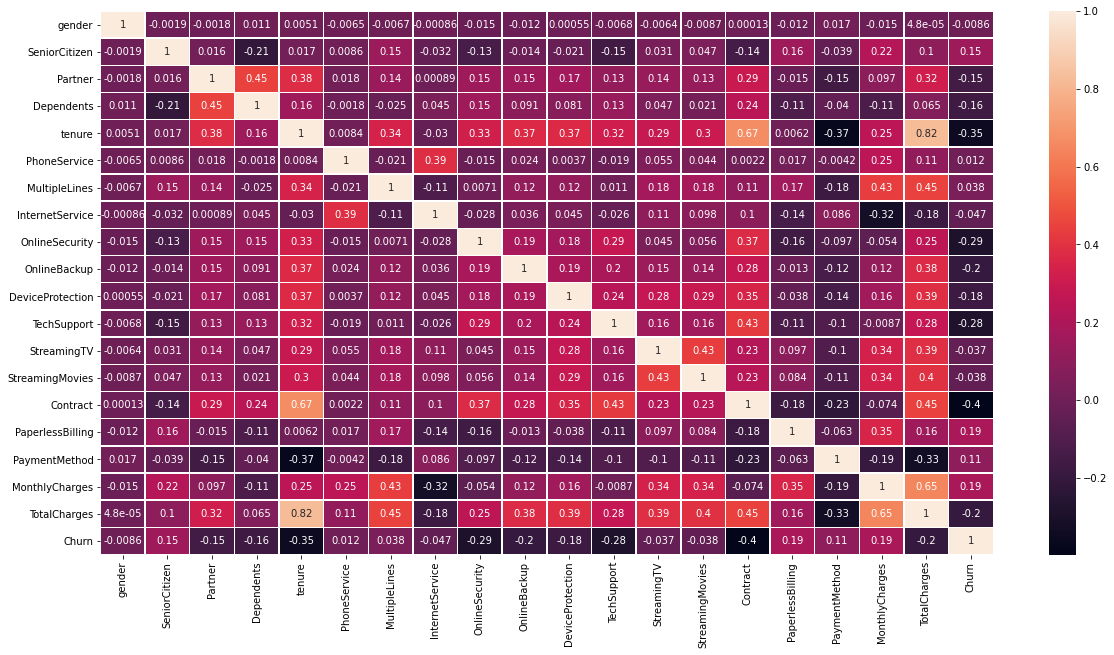

In [34]:
corr= raw_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,linewidths=.5)
plt.show()

In [35]:
#We can see that MultipleLines and InternetService, Contract and PaperlessBilling, PaymentMethod and MonthlyCharges,
#TotalCharges and Churn are highily correlated with each other.

In [36]:
x = raw_data.iloc[:,:-1]

In [37]:
x.shape

(7043, 19)

In [38]:
y = raw_data.iloc[:,-1]

In [39]:
y.shape

(7043,)

In [40]:
y.dtype

dtype('int32')

In [41]:
x.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [42]:
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [43]:
#from sklearn.preprocessing import power_transform
#raw_data = power_transform(raw_data, method = 'yeo-johnson')

In [44]:
pca=PCA(n_components=10) # Here we bringing the number of columns from 20 to 10 

In [45]:
x=pca.fit_transform(x)

In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [47]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
max_score = 0
for i in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    for j in models:
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=accuracy_score(pred,test_y)
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 0.815471965933286 of model: SVC() with best random state value is: 59


In [48]:
sv=SVC()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
sv.fit(train_x,train_y)
predsv = sv.predict(test_x).astype(int)
print("Accuracy score:",accuracy_score(predsv,test_y))
print("Confusion matrix:\n", confusion_matrix(test_y, predsv))
print("Classification report:",classification_report(test_y,predsv))
print("Random state used is:",final_temp_state )

Accuracy score: 0.815471965933286
Confusion matrix:
 [[974  77]
 [183 175]]
Classification report:               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1051
           1       0.69      0.49      0.57       358

    accuracy                           0.82      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.82      0.80      1409

Random state used is: 59


In [49]:
predsv

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
cross_score_sv=cross_val_score(sv,x,y,cv=5)
print("Cross validation score=", cross_score_sv)
print("Cross validation mean score=", cross_score_sv.mean())
print("Cross validation standard deviation score=", cross_score_sv.std())

Cross validation score= [0.78850248 0.79843861 0.77998581 0.796875   0.79900568]
Cross validation mean score= 0.7925615160655526
Cross validation standard deviation score= 0.007338908269862465


In [51]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [52]:
abc = AdaBoostClassifier(n_estimators=50,base_estimator=sv,learning_rate=1,algorithm='SAMME')
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
abc.fit(train_x,train_y)
predabc = abc.predict(test_x)
print("Accuracy score:",accuracy_score(predabc,test_y))

Accuracy score: 0.7459190915542938


In [53]:
# We can see that accuracy score of SVC is better than AdaBoostClassifier and hence we will save SVC model. 

In [54]:
output_data_sv=pd.DataFrame(predsv)
output_data_sv.to_csv("E:\\python\\Telecom_customer_churn_prediction.csv",header=0)

In [55]:
import pickle
filename = 'E:\\python\\Telecom_customer_churn_prediction.pkl'
pickle.dump(sv,open(filename,'wb'))